# Les optimisations en gestion de projet

# Introduction 
Dans certains cas, il s'agit d'optimisations de type Ordonnancement, mais appliqués à la gestion de projet, dans d'autres cas, il peut s'agit d'appliquer un modèle Knapsack afin de maximiser la performance d'une équipe par exemple.

Etude globale proposée par Estelle Derrien - Github15000

*** CREATION EN COURS ***


# Sommaire

- 1. Ordonnancement de projet
        - Notre problème de base
        - Modélisation mathématique
        - Résolution avec les solveurs
             - Solveur Cplex
             - Solveur Python Mip
             - Solveur Pulp
- 2. Création d'équipes
        - Notre problème de base
        - Modélisation mathématique
        - Résolution


# 1. Ordonnancement de projet

# Introduction 

Pour notre projet, on a n tâches, qui ont m prédecesseurs .
Il faut minimiser le temps global d'exécution du projet. 

# Notre problème de base .



# Modélisation mathématique

A venir !

# Résolution avec Python Cplex

Ici, on se base sur la bonne documentation suivante : https://ibmdecisionoptimization.github.io/tutorials/html/Scheduling_Tutorial.html#Chapter-2.-Modeling-and-solving-a-simple-problem:-house-building

Le solveur donne donc l'ordonnancement des travaux, pour minimiser le temps total d'exécution, en tenant compte des prédécesseurs.


Solving model....
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 10 variables, 14 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 33.2 (before), 33.2 (after)
 !  . Memory usage      : 302.7 kB (before), 302.7 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 ! Using iterative diving.
 *                     10  0.01s        1            -
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 80
 ! Number of fails        : 2
 ! Total memory usage     : 2.6 MB (2.6 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    :

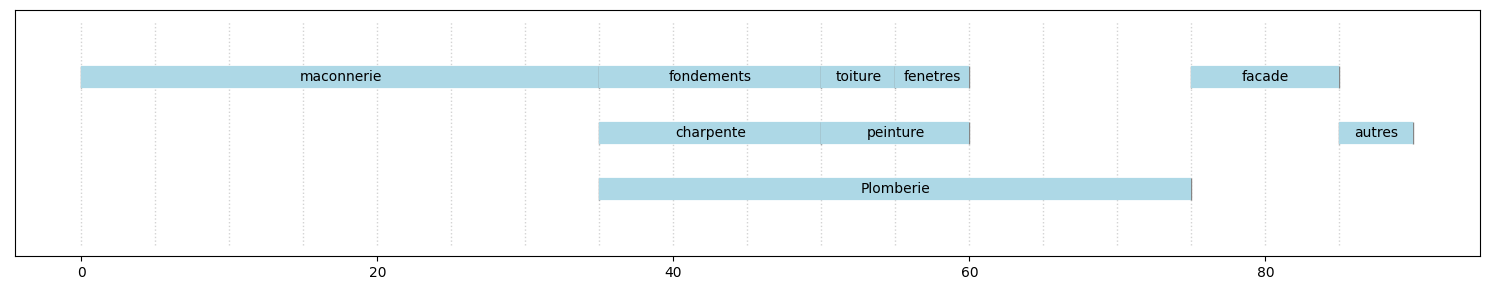

In [17]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On importe ces libs spéciales pour ce type d'optimisations Gestion projet/Schedule
import sys
from docplex.cp.model import *

# On crée notre modèle
model = Model(name='minimisation_temps_execution', log_output=True)
model = CpoModel()


# On crée nos variables de décision
maconnerie = model.interval_var(size=35)
charpente = model.interval_var(size=15)
Plomberie = model.interval_var(size=40)
fondements = model.interval_var(size=15)
toiture = model.interval_var(size=5)
peinture = model.interval_var(size=10)
fenetres = model.interval_var(size=5)
facade = model.interval_var(size=10)
jardin = model.interval_var(size=5)
autres = model.interval_var(size=5)

# Précédence
model.add( model.end_before_start(maconnerie, charpente) )
model.add( model.end_before_start(maconnerie, Plomberie) )
model.add( model.end_before_start(maconnerie, fondements) )
model.add( model.end_before_start(charpente, toiture) )
model.add( model.end_before_start(fondements, peinture) )
model.add( model.end_before_start(toiture, fenetres) )
model.add( model.end_before_start(toiture, facade) )
model.add( model.end_before_start(Plomberie, facade) )
model.add( model.end_before_start(toiture, jardin) )
model.add( model.end_before_start(Plomberie, jardin) )
model.add( model.end_before_start(fenetres, autres) )
model.add( model.end_before_start(facade, autres) )
model.add( model.end_before_start(jardin, autres) )
model.add( model.end_before_start(peinture, autres) )

# Résoudre
print("\nSolving model....")
msol0 = model.solve( TimeLimit=10)
print("done")

var_sol = msol0.get_var_solution(maconnerie)
print("maconnerie : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(charpente)
print("charpente : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(Plomberie)
print("Plomberie : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(fondements)
print("fondements : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(toiture)
print("toiture : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(peinture)
print("peinture : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(fenetres)
print("fenetres : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(facade)
print("Facade : {}..{}".format(var_sol.get_start(), var_sol.get_end()))
var_sol = msol0.get_var_solution(autres)
print("autres : {}..{}".format(var_sol.get_start(), var_sol.get_end()))


import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
%matplotlib inline
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

wt = msol0.get_var_solution(maconnerie)   
visu.interval(wt, 'lightblue', 'maconnerie')   
wt = msol0.get_var_solution(charpente)   
visu.interval(wt, 'lightblue', 'charpente')
wt = msol0.get_var_solution(Plomberie)   
visu.interval(wt, 'lightblue', 'Plomberie')
wt = msol0.get_var_solution(fondements)   
visu.interval(wt, 'lightblue', 'fondements')
wt = msol0.get_var_solution(toiture)   
visu.interval(wt, 'lightblue', 'toiture')
wt = msol0.get_var_solution(peinture)   
visu.interval(wt, 'lightblue', 'peinture')
wt = msol0.get_var_solution(fenetres)   
visu.interval(wt, 'lightblue', 'fenetres')
wt = msol0.get_var_solution(facade)   
visu.interval(wt, 'lightblue', 'facade')
wt = msol0.get_var_solution(autres)   
visu.interval(wt, 'lightblue', 'autres')
visu.show()

